In [1]:
import numpy as np
import matplotlib.pyplot as plt

# BISECTION METHOD
- Step 1: Choose lower $x_{l}$ and upper $x_{u}$ guesses for the root such that the function changes sign
    over the interval. This can be checked by ensuring that $f(x_{l})f(x_{u}) > 0$
- Step 2: An estimate of the root xr is determined by
$x_{r} = \frac{x_{l}+x_{u}}{2}$
- Step 3: Make the following evaluations to determine in which subinterval the root lies:
    * (a) If $f(x_{l})f(x_{r}) < 0$ the root lies in the lower subinterval. Therefore, set $x_{u}=x_{r}$ and return
         to step 2.
    * (b) If $f(x_{l})f(x_{r}) > 0$ the root lies in the upper subinterval. Therefore, set $x_{l}=x_{r}$ and return
        to step 2.
    * (c) If $f(x_{l})f(x_{r}) = 0$ the root equals xr; terminate the computation.
    
Create a function of BISECTION METHOD
 - xl = $x_{l}$
 - xu = $x_{u}$
 - err = $e_{s}$
 - fnc = $f(x)$
 - xrn = $x_{r}^{new}$
 - xr = $x_{r}$ or $x_{r}^{old}$

In [2]:
def Bisection(xl, xu, err, fnc):
    print('Bisection')
    ea = err+100
    i = 0
    xrn = 0
    fxl = fnc(xl)
    x = np.array([])
    y = np.array([])
    while not ea <= err:
        x = np.append(x,i)
        xr = xrn
        xrn = (xl+xu)/2
        fxr = fnc(xrn)
        if not xrn == 0:
            ea = np.abs(((xrn - xr) / xrn)) * 100
        y = np.append(y, ea)
        if (fxl * fxr < 0):
            xu = xrn
        elif (fxl * fxr >0):
            xl = xrn
            fxl = fxr
        else:
            print('step = {:3d}, Answer = {:22}, error = {} %'.format(i,xrn,ea))
            return x, y
            break
        print('step = {:3d}, Answer = {:22}, error = {} %'.format(i,xrn,ea))
        i += 1
    return x, y

# FALSE-POSITION METHOD
- Step 1: Choose lower $x_{l}$ and upper $x_{u}$ guesses for the root such that the function changes sign
    over the interval. This can be checked by ensuring that $f(x_{l})f(x_{u}) > 0$
- Step 2: An estimate of the root xr is determined by
$x_{r}=x_{u}-\frac{f(x_{u})(x_{l}-x_{u})}{f(x_{l})-f(x_{u})}$
- Step 3: Make the following evaluations to determine in which subinterval the root lies:
    * (a) If $f(x_{l})f(x_{r}) < 0$ the root lies in the lower subinterval. Therefore, set $x_{u}=x_{r}$ and return
         to step 2.
    * (b) If $f(x_{l})f(x_{r}) > 0$ the root lies in the upper subinterval. Therefore, set $x_{l}=x_{r}$ and return
        to step 2.
    * (c) If $f(x_{l})f(x_{r}) = 0$ the root equals xr; terminate the computation.

Create a function of FALSE-POSITION METHOD
 - xl = $x_{l}$
 - xu = $x_{u}$
 - err = $e_{s}$
 - fnc = $f(x)$
 - xrn = $x_{r}^{new}$
 - xr = $x_{r}$ or $x_{r}^{old}$

In [3]:
def FlasePosition(xl, xu, err, fnc):
    print('FlasePosition')
    xrn = 0
    i = 0
    ea = err +100
    fxl = fnc(xl)
    fxu = fnc(xu)
    x = np.array([])
    y = np.array([])
    while not ea <= err:
        x = np.append(x,i)
        xr = xrn
        xrn = xu - (fxu * (xl - xu))/(fxl - fxu)
        fxr = fnc(xrn)
        if not xrn == 0:
            ea = np.abs((xrn - xr)/xrn) * 100
        y = np.append(y, ea)
        if (fxl * fxr <0):
            xu = xrn
            fxu = fxr
        elif (fxl * fxr >0):
            xl = xrn
            fxl = fxr
        else:
            print('step = {:3d}, Answer = {:22}, error = {} %'.format(i,xrn,ea))
            return x, y
            break
        print('step = {:3d}, Answer = {:22}, error = {} %'.format(i,xrn,ea))
        i += 1
    return x, y

# NEWTON-RAPHSON METHOD
- Step 1: Find the derivative of $f(x)$
- Step 2: Choose $x_{i}$
- Step 3: An estimate of the root xr is determined by
$x_{i+1}=x_{i}-\frac{f(x_{i})}{f'(x_{i})}$
- Step 4: Give $x_{i} = x_{i+1}$ and return step 3

Create a function of NEWTON-RAPHSON METHOD
 - xi = $x_{i}$
 - xi1 = $x_{i+1}$
 - err = $e_{s}$
 - fnc = $f(x)$
 - dfnc = $f'(x)$

In [4]:
def Newton(xi, err, fnc, dfnc):
    print('Newton-Raphson')
    ea = err + 100
    i = 0
    y = np.array([])
    x = np.array([])
    while not ea <= err:
        xi1 = xi - fnc(xi)/dfnc(xi)
        ea = np.abs((xi1 - xi)/xi1) * 100
        print('step = {:3d}, Answer = {:22}, error = {} %'.format(i, xi1, ea))
        y = np.append(y, ea)
        x = np.append(x, i)
        xi = xi1
        i += 1
    return x, y

# SECANT METHOD
- Step 1: Choose $x_{i-1}$ and $x_{i}$
- Step 2: An estimate of the root xr is determined by
$x_{i+1}=x_{i}-\frac{f(x_{i})(x_{i-1} - x_{i})}{f(x_{i-1})-f(x_{i})}$
- Step 3: Give $x_{i-1} = x_{i}$, $x_{i} = x_{i+1}$ and return step 2

Create a function of SECANT METHOD
 - xi = $x_{i}$
 - xi_1 = $x_{i-1}$
 - xi1 = $x_{i+1}$
 - err = $e_{s}$
 - fnc = $f(x)$

In [5]:
def Secant(xi_1, xi, err, fnc):
    print('Secant')
    ea = err + 100
    x = np.array([])
    y = np.array([])
    i = 0
    while not ea <= err:
        xi1 = xi - (fnc(xi) * (xi_1 - xi))/(fnc(xi_1) - fnc(xi))
        ea = np.abs((xi1 - xi)/xi1) * 100
        print('step = {:3d}, Answer = {:22}, error = {} %'.format(i, xi1, ea))
        y = np.append(y, ea)
        x = np.append(x, i)
        xi_1 = xi
        xi = xi1
        i += 1
    return x, y

# Error Estimates
$e_{a} = \left |\frac{x^{new}-x^{old}}{x^{new}}  \right |\times 100$ %

**8.29** Perform the same computation as in Sec. 8.3, but determine the value of L required for the circuit to dissipate to 1% of its original value in $t = 0.05 s$, Given $R = 280$  $\Omega$ and $C = 10^-4 F$

Create function of $f(L) = e^{-Rt/2L}cos\left[\sqrt{\frac{1}{LC}-\left(\frac{R}{2L}\right)^{2}}t\right] - \frac{q}{q_{0}}$

and 

$f'(L) = e^{-Rt/2L}\left[-sin\left [\sqrt{\frac{1}{LC}-\left(\frac{R}{2L}\right)^{2}}t \right ]\left(\frac{\frac{t}{2}\left(\frac{R^{2}}{2L^{3}}-\frac{1}{CL^{2}}\right)}{\sqrt{\frac{1}{LC}-\left(\frac{R}{2L}\right)^{2}}}\right)\right]+cos\left [ \sqrt{\frac{1}{LC}-\left ( \frac{R}{2L}^{2} \right )}t \right ]e^{-Rt/2L}\frac{Rt}{2L^{2}}$

In [6]:
C = 1e-4
R = 280.0
t = 0.05
#q0/q(t)
qq0 = 0.01

def fncL(L):
    eP = np.exp(-(R * t/(2 * L)))
    sq = ((1/(L * C)) - ((R/(2 * L))**2))**(1/2)
    fl = eP * np.cos(sq * t) - qq0
    return fl

def dfncL(L):
    #not yet *t
    theta = np.sqrt((1/(L * C)) - (R/(2 * L))**2)
    eP = np.exp(-((R * t)/(2 * L)))
    eq1 = eP * (-(np.sin(theta * t))) * (((t/2) * ((R**2)/(2 * (L**3))) - (1/(C * (L**2))))/theta)
    eq2 = np.cos(theta * t) * eP * ((R * t)/(2 * (L**2)))
    dfL = eq1 + eq2
    return dfL

Call the function to find the answer with Bisection Method, Flase-Position Method, Newton-Raphson Method and Secant Method.

Plot graph of $f(L)$ and Graph comparison of the relative errors

Bisection
step =   0, Answer =                    7.5, error = 100.0 %
step =   1, Answer =                   8.75, error = 14.285714285714285 %
step =   2, Answer =                  8.125, error = 7.6923076923076925 %
step =   3, Answer =                 7.8125, error = 4.0 %
step =   4, Answer =                7.96875, error = 1.9607843137254901 %
step =   5, Answer =               7.890625, error = 0.9900990099009901 %
step =   6, Answer =              7.8515625, error = 0.4975124378109453 %
step =   7, Answer =             7.83203125, error = 0.24937655860349126 %
step =   8, Answer =            7.841796875, error = 0.12453300124533001 %
step =   9, Answer =           7.8369140625, error = 0.06230529595015576 %
step =  10, Answer =          7.83935546875, error = 0.03114294612270321 %
step =  11, Answer =         7.840576171875, error = 0.015569048731122527 %
step =  12, Answer =        7.8411865234375, error = 0.007783918424534911 %
step =  13, Answer =       7.84149169921875, err

Text(0, 0.5, '%Error')

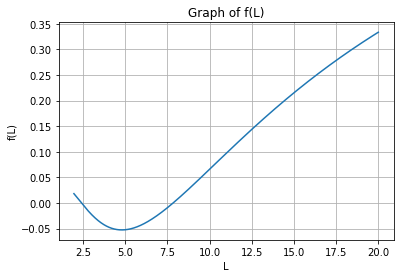

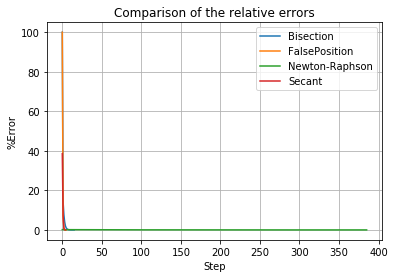

In [7]:
x1, y1 = Bisection(5,10,0.001,fncL)
x2, y2 = FlasePosition(5,10,0.001,fncL)
x3, y3 = Newton(7, 0.001, fncL, dfncL)
x4, y4 = Secant(5, 10, 0.001, fncL)

x = np.arange(1.96,20,1e-4)
#x = np.linspace(0,20,1000)
fig1 = plt.figure()
plt.title('Graph of f(L)')
plt.plot(x, fncL(x))
plt.ylabel('f(L)')
plt.xlabel('L')
plt.grid()

fig2 = plt.figure()
plt.title('Comparison of the relative errors')
plt.plot(x1, y1, label = 'Bisection')
plt.plot(x2, y2, label = 'FalsePosition')
plt.plot(x3, y3, label = 'Newton-Raphson')
plt.plot(x4, y4, label = 'Secant')
plt.legend()
plt.grid()
plt.xlabel('Step')
plt.ylabel('%Error')

**Answer**

Bisection Method      >> 16  step, L = 7.84145, $e_{s}$ = 0.000972 %

Flase-Position Method >> 6   step, L = 7.84147, $e_{s}$ = 0.000348 %

Newton-Raphson Method >> 386 step, L = 7.83566, $e_{s}$ = 0.000989 %

Secant Method         >> 5   step, L = 7.84147, $e_{s}$ = 0.000151 %

**8.33** Figure P8.33 shows a circuit with a resistor, an inductor, and a capacitor in parallel. Kirchhoff’s rules can be used to
express the impedance of the system as
$$\frac{1}{Z}=\sqrt{(\frac{1}{R^{2}})+(\omega C-\frac{1}{\omega L})^{2}}$$
where $Z$ = impedance $(\Omega )$ and $\omega$ = the angular frequency. Find the $\omega$ that results in an impedance of $75 \Omega$ using both bisection and false position with initial guesses of 1 and 1000 for the following parameters: $R = 225$ $\Omega$, $C = 0.6 x 10^{-6} F$, and $L = 0.5 H$. Determine how many iterations of each technique are necessary to determine
the answer to $e_{s} = 0.1$%. Use the graphical approach to explain any difficulties that arise.
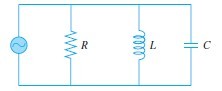
Figure P8.33

Create a function of $f(\omega)=\frac{1}{\sqrt{(\frac{1}{R^{2}})+(\omega C-\frac{1}{\omega L})^{2}}} - z$

In [8]:
def fncW(w):
    Z = 75
    R = 225
    C = 0.6e-6
    L = 0.5
    
    eq1 = ((w * C) - (1/(w * L)))**2
    eq2 = 1/(R**2)
    fw = 1/np.sqrt(eq2 + eq1) - Z
    return fw

Call the function to find the answer with Bisection Method and Flase-Position Method.

Plot graph of $f(\omega)$ and Graph comparison of the relative errors

Bisection
step =   0, Answer =                  500.5, error = 100.0 %
step =   1, Answer =                 250.75, error = 99.6011964107677 %
step =   2, Answer =                125.875, error = 99.20556107249256 %
step =   3, Answer =               188.3125, error = 33.15632260205775 %
step =   4, Answer =              157.09375, error = 19.872687487567138 %
step =   5, Answer =             172.703125, error = 9.038270152899665 %
step =   6, Answer =            164.8984375, error = 4.733026957881272 %
step =   7, Answer =           160.99609375, error = 2.4238748028630352 %
step =   8, Answer =          159.044921875, error = 1.2268055163267062 %
step =   9, Answer =         158.0693359375, error = 0.6171886101209046 %
step =  10, Answer =        157.58154296875, error = 0.3095495573658231 %
step =  11, Answer =       157.825439453125, error = 0.1545355965553567 %
step =  12, Answer =      157.9473876953125, error = 0.07720814124684579 %
FlasePosition
step =   0, Answer =     348.612

Text(0, 0.5, '%Error')

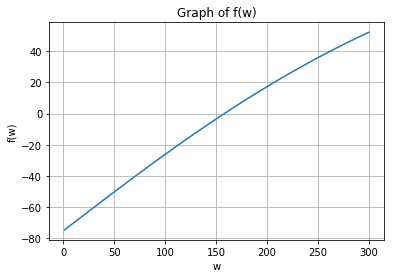

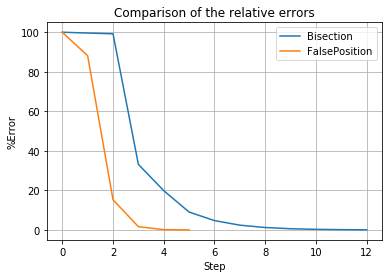

In [9]:
w1, z1 = Bisection(1, 1000, 0.1, fncW)
w2, z2 = FlasePosition(1, 1000, 0.1, fncW)
x = np.arange(1, 300, 1e-2)
#x = np.linspace(0,20,1000)
fig1 = plt.figure()
plt.title('Graph of f(w)')
plt.plot(x, fncW(x))
plt.xlabel('w')
plt.ylabel('f(w)')
plt.grid()

fig2 = plt.figure()
plt.title('Comparison of the relative errors')
plt.plot(w1, z1, label = 'Bisection')
plt.plot(w2, z2, label = 'FalsePosition')
plt.legend()
plt.grid()
plt.xlabel('Step')
plt.ylabel('%Error')

**Answer**

Bisection Method >> Use 13 step, $\omega = 157.94738$, $e_{s} = 0.077208 $ %

FlasePosition Method >> Use 6 step, $\omega = 157.91155$, $e_{s} = 0.015748 $ %